In [1]:
# environment set up
import keras
from keras.models import Sequential
from keras.layers import Reshape, Conv1D, MaxPooling1D
import tensorflow as tf # only use tensorflow keras
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# working folder
directory = "/Users/Srikar/Desktop/Velexi/spectra-ml/data"
os.chdir(directory)

# print(os.getcwd())

Using TensorFlow backend.
/Users/Srikar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
dataset = str(directory + "/dataset3")
num_samples = len([name for name in os.listdir(dataset) if \
                   os.path.isfile(os.path.join(dataset,name))])

print(num_samples)

30


In [3]:
spectrum_len = 480
spectra = np.zeros((num_samples,spectrum_len))

spectrum_categories = np.zeros(num_samples)
first_record_of_mixtures_chapter = 11602
is_a_mineral = 1                                   # these numbers match the chapter numbers given by usgs
is_a_mixture = 2
spectrum_names = ["" for x in range(num_samples)]

y = np.zeros((num_samples, 1))

os.chdir(dataset)

i = 0

for filename in os.listdir(dataset):
    file_object  = open(filename, 'r').readlines()
#     strip off header, add to matrix 'spectra'
    spectra[i,:] = file_object[1:]

#     label spectrum class, based on header
#     actinolite: 0, alunite: 1, chlorite: 2
    material_name = file_object[0]
    
    spectrum_names[i] = material_name
    
    start = 'Record='
    end = ':'
    record_number = int((material_name.split(start))[1].split(end)[0])
    # print(record_number)
    if record_number < first_record_of_mixtures_chapter:
        spectrum_categories[i] = is_a_mineral
    else:
        spectrum_categories[i] = is_a_mixture

#     print(material_name)

    if material_name.find('Actinolite',) != -1: # if material name contains actinolite
        y[i,0] = 0
    elif material_name.find('Alun',)!= -1:
        y[i,0] = 1
    else: # chlorite
        y[i,0] = 2

#     turn missing points into 0
    for j in range(spectrum_len):
        if spectra[i,j] < 0:
            spectra[i,j] = 0
    i+=1

In [5]:
sample_indices = list(range(0, num_samples))
print(num_samples)
random.shuffle(sample_indices)
train_set_size = 3*(num_samples//5)
dev_set_size = (num_samples//5)
test_set_size= num_samples-dev_set_size - train_set_size
train_set_indices = sample_indices[1:train_set_size]
dev_set_indices = sample_indices[train_set_size: train_set_size+dev_set_size]
test_set_indices= sample_indices[train_set_size+dev_set_size: num_samples]
print(test_set_indices)

train_set = spectra[train_set_indices, :]
train_labels = y[train_set_indices, :]
dev_set = spectra[dev_set_indices, :]
dev_labels = y[dev_set_indices,:]
test_set = spectra[test_set_indices, :]
test_labels = y[test_set_indices, :]

30
[25, 12, 27, 28, 22, 18]


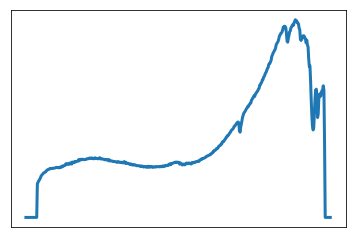

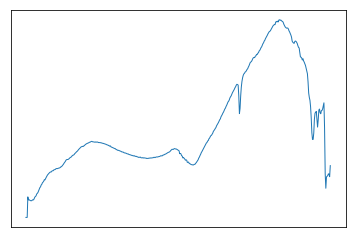

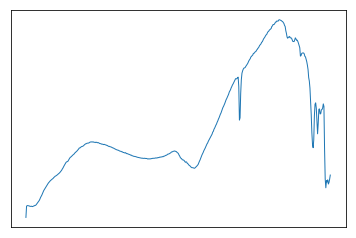

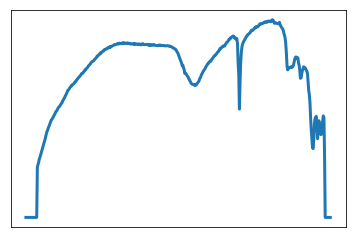

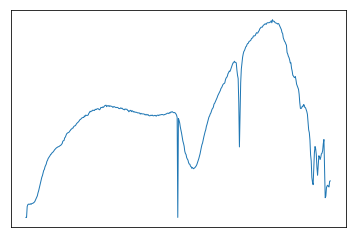

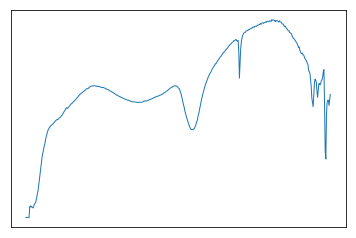

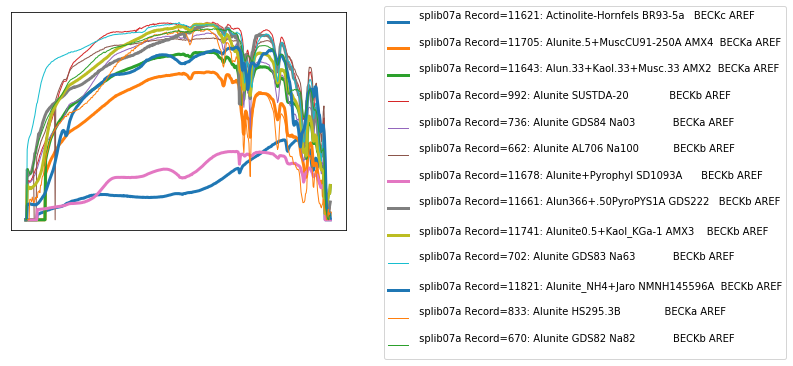

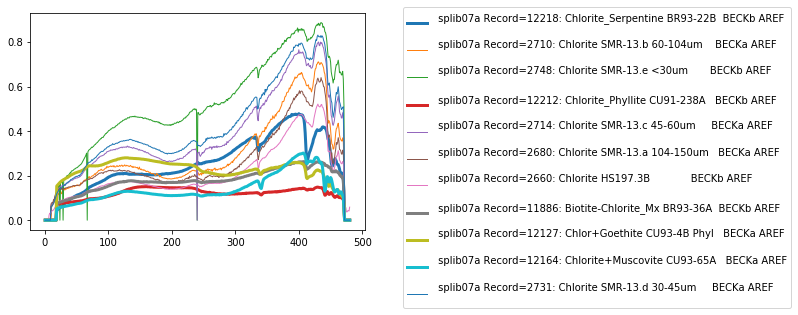

In [40]:
# --- plot the classes

# plot each class in a separate plot
# plot spectra names in legend
# plot minerals and mixtures w diff line widths

mineral_names = ["Actinolite", "Alunite", "Chlorite"]

# variables
num0 = 0 #number of samples of class 0
num1 = 0
num2 = 0

mineral_linewidth = 1         # linewidth = 1 is default
mixture_linewidth = 3         

# count the number of each class to make spectra0, spectra1, spectra2 databases
for i in range(num_samples):
    if y[i,0]== 0:
        num0 += 1
    elif y[i,0]== 1:
        num1 += 1
    elif y[i,0]== 2:
        num2 += 1

# make class-specific databases spectra0, ...1, ...2
spectra0 = np.zeros((num0,spectrum_len)) 
spectra1 = np.zeros((num1,spectrum_len)) 
spectra2 = np.zeros((num2,spectrum_len)) 

labels0 = ["" for x in range(num0)]
labels1 = ["" for x in range(num1)]
labels2 = ["" for x in range(num2)]

linewidth0 = np.zeros(num0)
linewidth1 = np.zeros(num1)
linewidth2 = np.zeros(num2)


# make counters for each database to place spectra
i0 = 0
i1 = 0
i2 = 0

# set linewidth for the spectrum 
# populate class-specific databases spectra0, ...1, ...2
for i in range(num_samples):
    
    # set linewidth
    #testcode
    #print(spectrum_categories)
    #print(spectrum_categories[i])
    
    if spectrum_categories[i] == is_a_mineral:
        linewidth = mineral_linewidth
        
        #testcode
        #print('min')
    else: 
        linewidth = mixture_linewidth
        
        #testcode
        #print('mix')
    
    # populate matrices for making each class plot
    if y[i,0]== 0:
        spectra0[i0,:] = spectra[i,:]
        labels0[i0] = spectrum_names[i]
        linewidth0[i0] = linewidth
        i0 +=1
    elif y[i,0]== 1:
        spectra1[i1,:] = spectra[i,:]
        labels1[i1] = spectrum_names[i]
        linewidth1[i1] = linewidth
        i1 +=1
    else:
        spectra2[i2,:] = spectra[i,:]
        labels2[i2] = spectrum_names[i]
        linewidth2[i2] = linewidth
        i2 +=1

# plot each class-specific database separately
for i in range(i0):
    fig = plt.figure()
    plt.plot(range(1, spectrum_len+1), spectra0[i,:], label = labels0[i], linewidth = linewidth0[i]) # remove linewidth for all mixtures/minerals to be standard
    plt.xticks([])
    plt.yticks([])
#     plt.show()
    path = "/Users/Srikar/Desktop/Velexi/spectra-ml/lab-notebook/smunukutla/plots/" + mineral_names[0] + str(i) + ".png"
    fig.savefig(path, format = "PNG")
# plt.legend(bbox_to_anchor=(1.1, 1.05))

for i in range(i1):
    plt.plot(range(1, spectrum_len+1), spectra1[i,:], label = labels1[i], linewidth = linewidth1[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i2):
    plt.plot(range(1, spectrum_len+1), spectra2[i,:], label = labels2[i], linewidth = linewidth2[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()  

In [34]:
model_m = Sequential()
model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model_m.add(Conv1D(100, 10, activation='relu', input_shape=(TIME_PERIODS, num_sensors)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

NameError: name 'TIME_PERIODS' is not defined

In [ ]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 400
EPOCHS = 50

history = model_m.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)